# Importance of decision tree hyperparameters on generalization

In this notebook, we illustrate the importance of some key hyperparameters on
the decision tree; we demonstrate their effects on the classification and
regression problems we saw previously.

First, we load the classification and regression datasets.

In [1]:
import pandas as pd

data_clf_columns = ["Culmen Length (mm)", "Culmen Depth (mm)"]
target_clf_column = "Species"
data_clf = pd.read_csv("../datasets/penguins_classification.csv")

In [2]:
data_reg_columns = ["Flipper Length (mm)"]
target_reg_column = "Body Mass (g)"
data_reg = pd.read_csv("../datasets/penguins_regression.csv")

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

## Create helper functions

We create some helper functions to plot the data samples as well as the
decision boundary for classification and the regression line for regression.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay


def fit_and_plot_classification(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    if data[target_names].nunique() == 2:
        palette = ["tab:red", "tab:blue"]
    else:
        palette = ["tab:red", "tab:blue", "black"]
    DecisionBoundaryDisplay.from_estimator(
        model,
        data[feature_names],
        response_method="predict",
        cmap="RdBu",
        alpha=0.5,
    )
    sns.scatterplot(
        data=data,
        x=feature_names[0],
        y=feature_names[1],
        hue=target_names,
        palette=palette,
    )
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")


def fit_and_plot_regression(model, data, feature_names, target_names):
    model.fit(data[feature_names], data[target_names])
    data_test = pd.DataFrame(
        np.arange(data.iloc[:, 0].min(), data.iloc[:, 0].max()),
        columns=data[feature_names].columns,
    )
    target_predicted = model.predict(data_test)

    sns.scatterplot(
        x=data.iloc[:, 0], y=data[target_names], color="black", alpha=0.5
    )
    plt.plot(data_test.iloc[:, 0], target_predicted, linewidth=4)

## Effect of the `max_depth` parameter

The hyperparameter `max_depth` controls the overall complexity of a decision
tree. This hyperparameter allows to get a trade-off between an under-fitted
and over-fitted decision tree. Let's build a shallow tree and then a deeper
tree, for both classification and regression, to understand the impact of the
parameter.

We can first set the `max_depth` parameter value to a very low value.

In [4]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

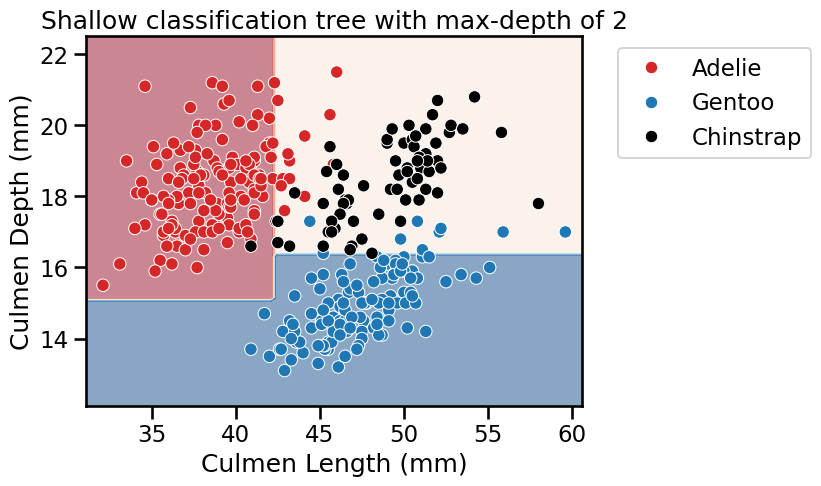

In [5]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Shallow classification tree with max-depth of {max_depth}")

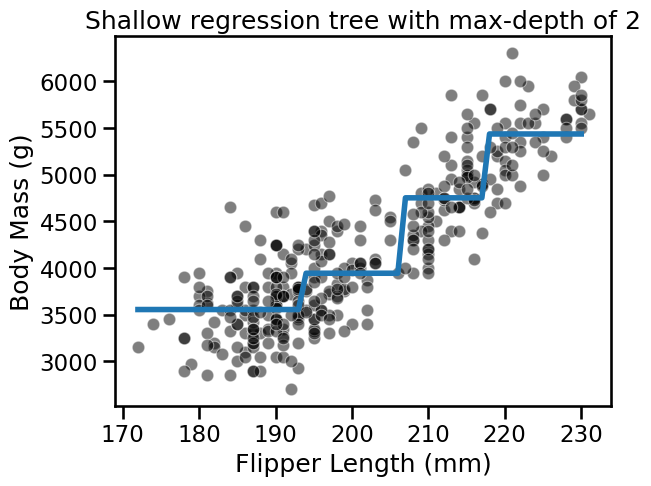

In [6]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Shallow regression tree with max-depth of {max_depth}")

Now, let's increase the `max_depth` parameter value to check the difference by
observing the decision function.

In [7]:
max_depth = 30
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
tree_reg = DecisionTreeRegressor(max_depth=max_depth)

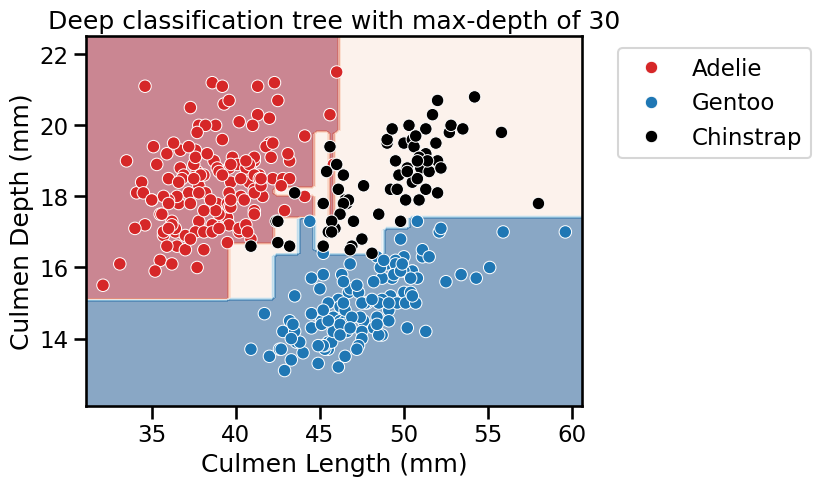

In [8]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Deep classification tree with max-depth of {max_depth}")

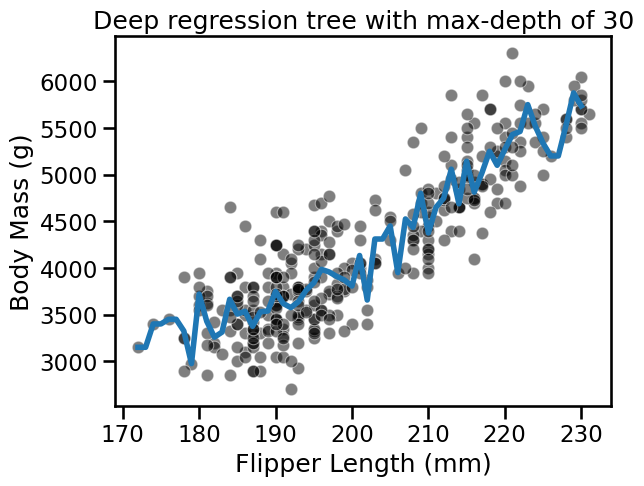

In [9]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(f"Deep regression tree with max-depth of {max_depth}")

For both classification and regression setting, we observe that increasing the
depth makes the tree model more expressive. However, a tree that is too deep
may overfit the training data, creating partitions which are only correct for
"outliers" (noisy samples). The `max_depth` is one of the hyperparameters that
one should optimize via cross-validation and grid-search.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {"max_depth": np.arange(2, 10, 1)}
tree_clf = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid)
tree_reg = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid)

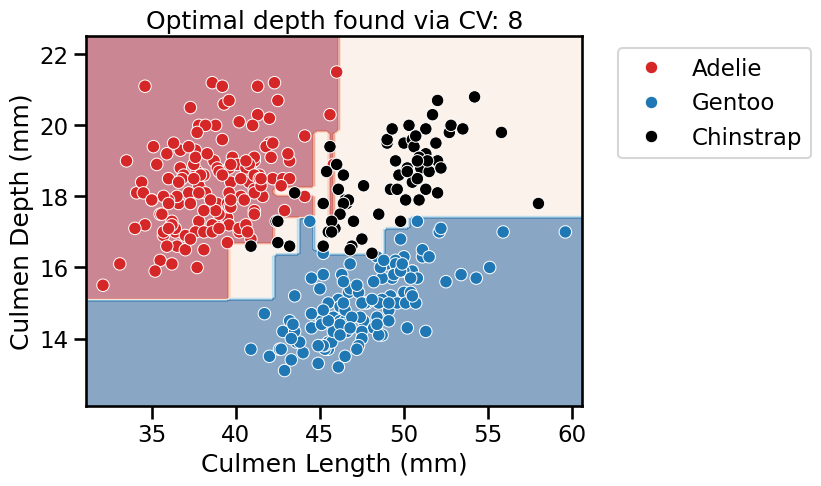

In [11]:
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_clf.best_params_['max_depth']}"
)

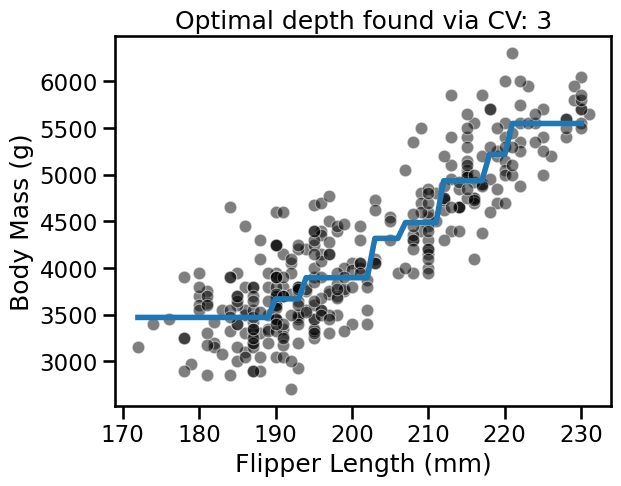

In [12]:
fit_and_plot_regression(
    tree_reg, data_reg, data_reg_columns, target_reg_column
)
_ = plt.title(
    f"Optimal depth found via CV: {tree_reg.best_params_['max_depth']}"
)

With this example, we see that there is not a single value that is optimal for
any dataset. Thus, this parameter is required to be optimized for each
application.

## Other hyperparameters in decision trees

The `max_depth` hyperparameter controls the overall complexity of the tree.
This parameter is adequate under the assumption that a tree is built
symmetrically. However, there is no reason why a tree should be symmetrical.
Indeed, optimal generalization performance could be reached by growing some of
the branches deeper than some others.

We build a dataset where we illustrate this asymmetry. We generate a dataset
composed of 2 subsets: one subset where a clear separation should be found by
the tree and another subset where samples from both classes are mixed. It
implies that a decision tree needs more splits to classify properly samples
from the second subset than from the first subset.

In [13]:
from sklearn.datasets import make_blobs

data_clf_columns = ["Feature #0", "Feature #1"]
target_clf_column = "Class"

# Blobs that are interlaced
X_1, y_1 = make_blobs(
    n_samples=300, centers=[[0, 0], [-1, -1]], random_state=0
)
# Blobs that can be easily separated
X_2, y_2 = make_blobs(n_samples=300, centers=[[3, 6], [7, 0]], random_state=0)

X = np.concatenate([X_1, X_2], axis=0)
y = np.concatenate([y_1, y_2])
data_clf = np.concatenate([X, y[:, np.newaxis]], axis=1)
data_clf = pd.DataFrame(
    data_clf, columns=data_clf_columns + [target_clf_column]
)
data_clf[target_clf_column] = data_clf[target_clf_column].astype(np.int32)

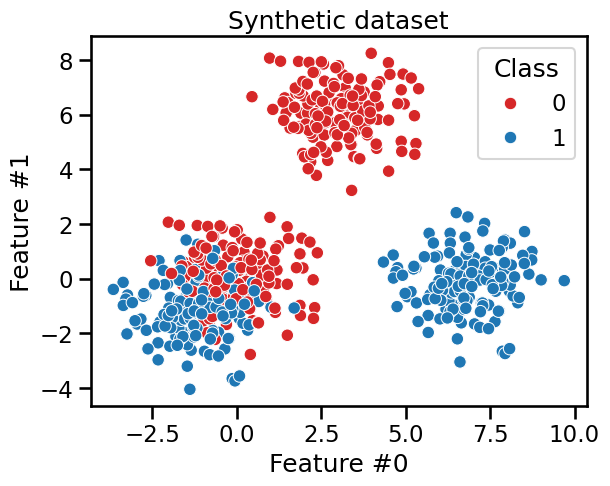

In [14]:
sns.scatterplot(
    data=data_clf,
    x=data_clf_columns[0],
    y=data_clf_columns[1],
    hue=target_clf_column,
    palette=["tab:red", "tab:blue"],
)
_ = plt.title("Synthetic dataset")

We first train a shallow decision tree with `max_depth=2`. We would expect
this depth to be enough to separate the blobs that are easy to separate.

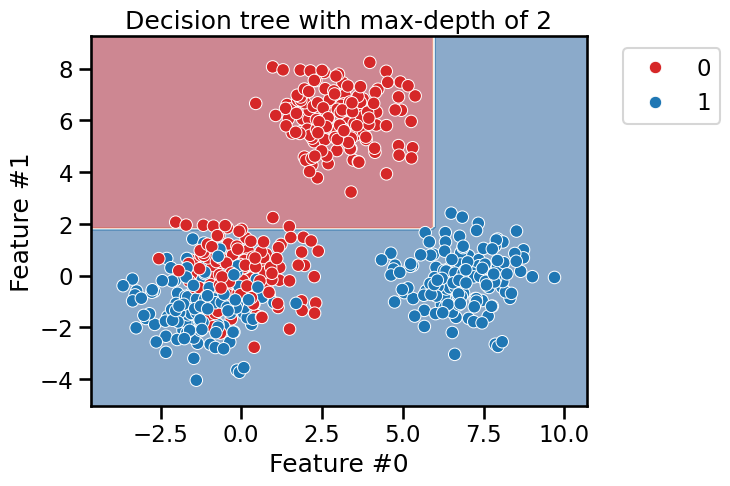

In [15]:
max_depth = 2
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

As expected, we see that the blue blob in the lower right and the red blob on
the top are easily separated. However, more splits are required to better
split the blob were both blue and red data points are mixed.

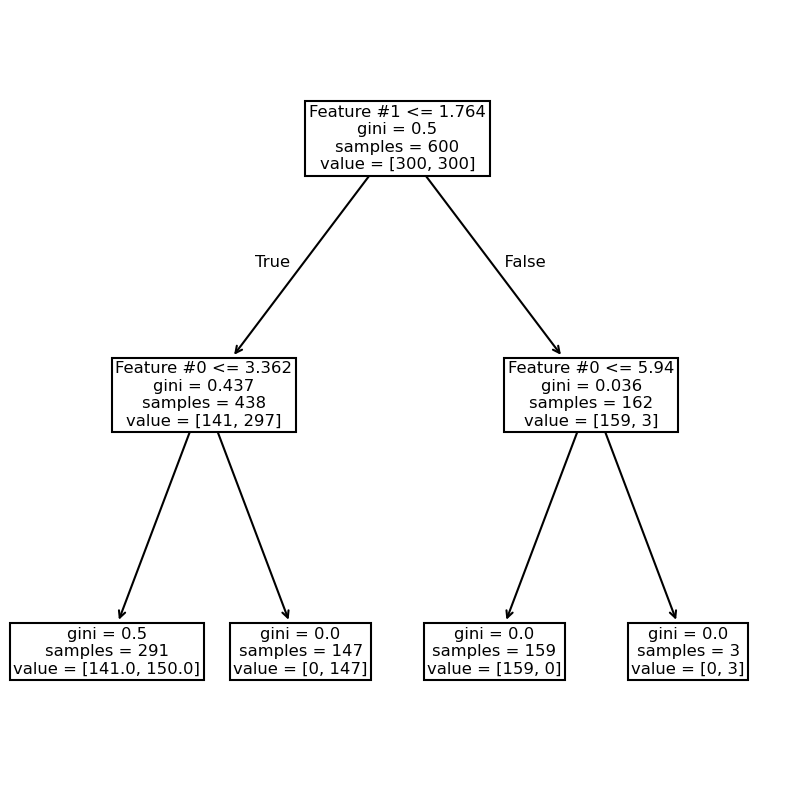

In [16]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(10, 10))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

We see that the right branch achieves perfect classification. Now, we increase
the depth to check how the tree grows.

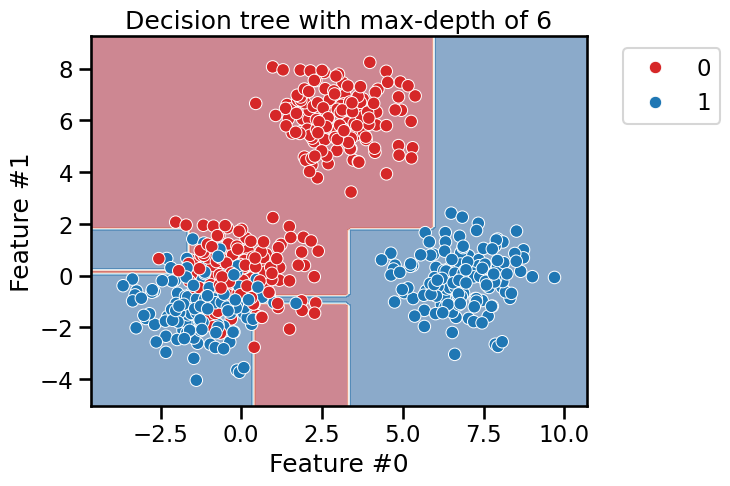

In [17]:
max_depth = 6
tree_clf = DecisionTreeClassifier(max_depth=max_depth)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(f"Decision tree with max-depth of {max_depth}")

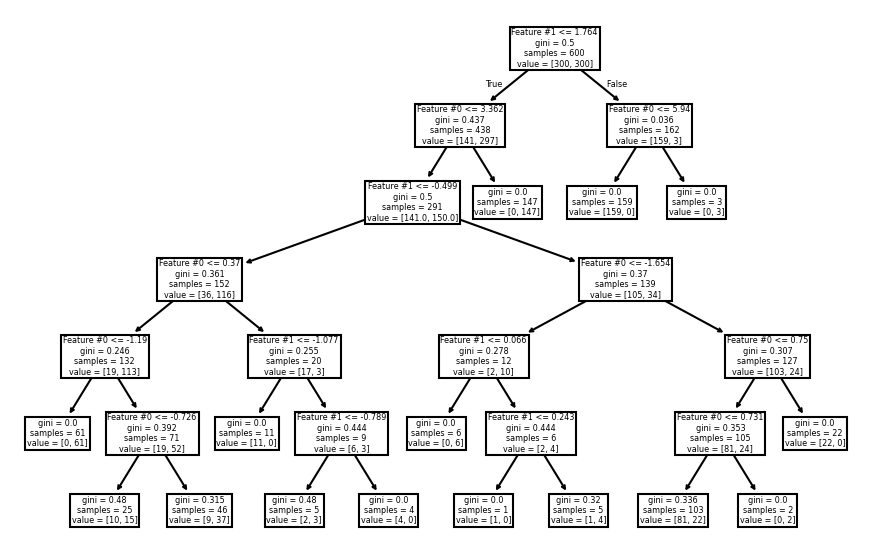

In [18]:
_, ax = plt.subplots(figsize=(11, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

As expected, the left branch of the tree continue to grow while no further
splits were done on the right branch. Fixing the `max_depth` parameter would
cut the tree horizontally at a specific level, whether or not it would be more
beneficial that a branch continue growing.

The hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`,
or `min_impurity_decrease` allow growing asymmetric trees and apply a
constraint at the leaves or nodes level. We check the effect of
`min_samples_leaf`.

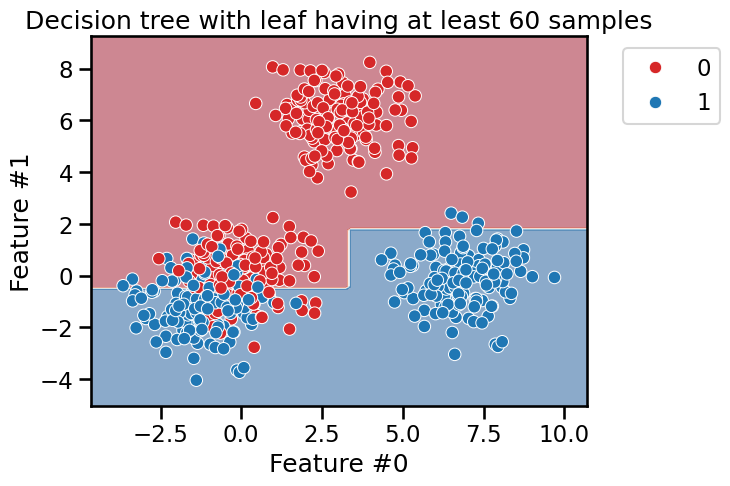

In [19]:
min_samples_leaf = 60
tree_clf = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
fit_and_plot_classification(
    tree_clf, data_clf, data_clf_columns, target_clf_column
)
_ = plt.title(
    f"Decision tree with leaf having at least {min_samples_leaf} samples"
)

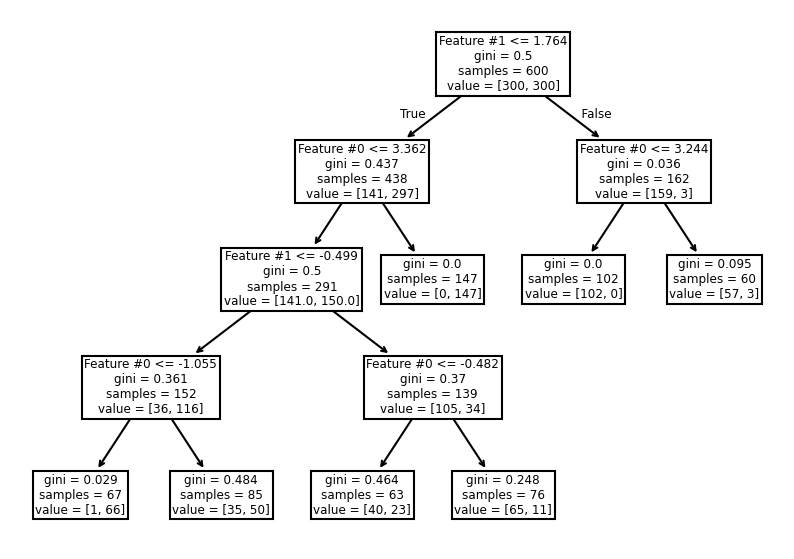

In [20]:
_, ax = plt.subplots(figsize=(10, 7))
_ = plot_tree(tree_clf, ax=ax, feature_names=data_clf_columns)

This hyperparameter allows to have leaves with a minimum number of samples and
no further splits are searched otherwise. Therefore, these hyperparameters
could be an alternative to fix the `max_depth` hyperparameter.